In [47]:
#Clasificación de dígitos con PCA y KMeans

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns


In [49]:
digits = load_digits()
X = digits.data
y = digits.target

In [50]:
#Reducir la dimensionalidad de un conjunto de imágenes de dígitos escritos a mano, utilizando PCA.
pca = PCA(n_components=50)

In [51]:
#Luego, aplicar KMeans para agrupar los dígitos en clústeres y ver cómo se relacionan con sus etiquetas reales. 
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [52]:
#El dataset mencionado anteriormente, contiene los pixeles de imágenes 28x28, que representan los dígitos del 0 al 9.
#Observar la variabilidad de los datos explicada por cada componente y elegir el número de componentes que retenga al menos el 90% de la varianza.

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1
cumulative_variance

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711])

In [53]:
#elegir el número de componentes que retenga al menos el 90% de la varianza.
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


In [54]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_reduced)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [57]:
silhouette_avg = silhouette_score(X_reduced, clusters)
silhouette_avg


0.21601389776727647

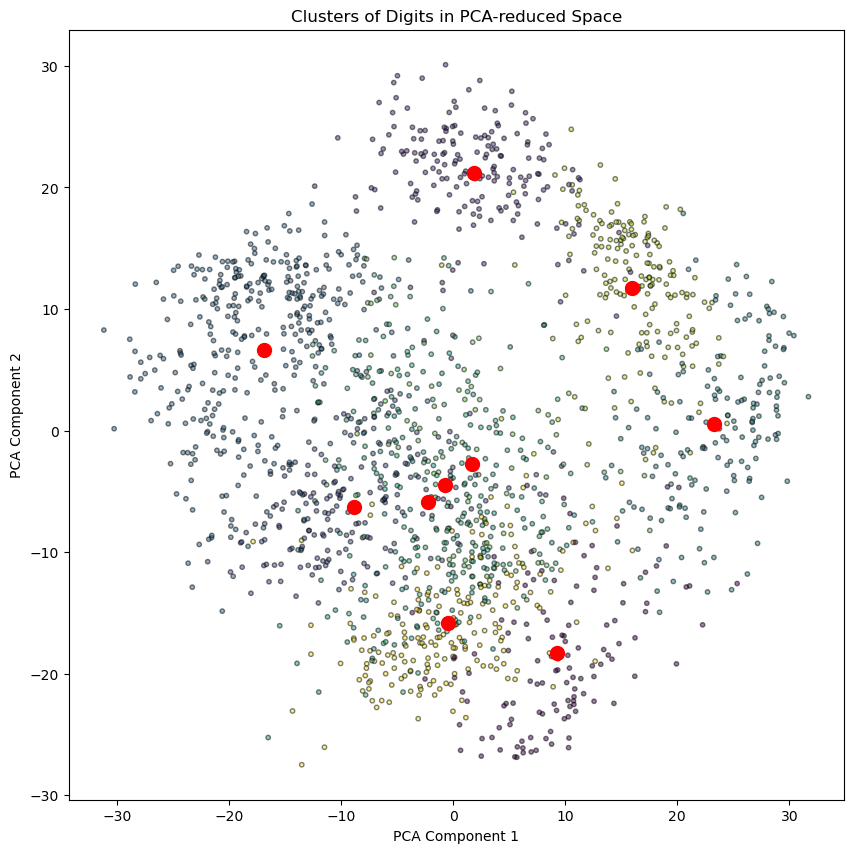

In [75]:
df_dig = pd.DataFrame({'cluster': clusters, 'label': y})

plt.figure(figsize=(10, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=10,
           alpha=0.5, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
#sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, palette='viridis', s=10)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Digits in PCA-reduced Space')
plt.show()

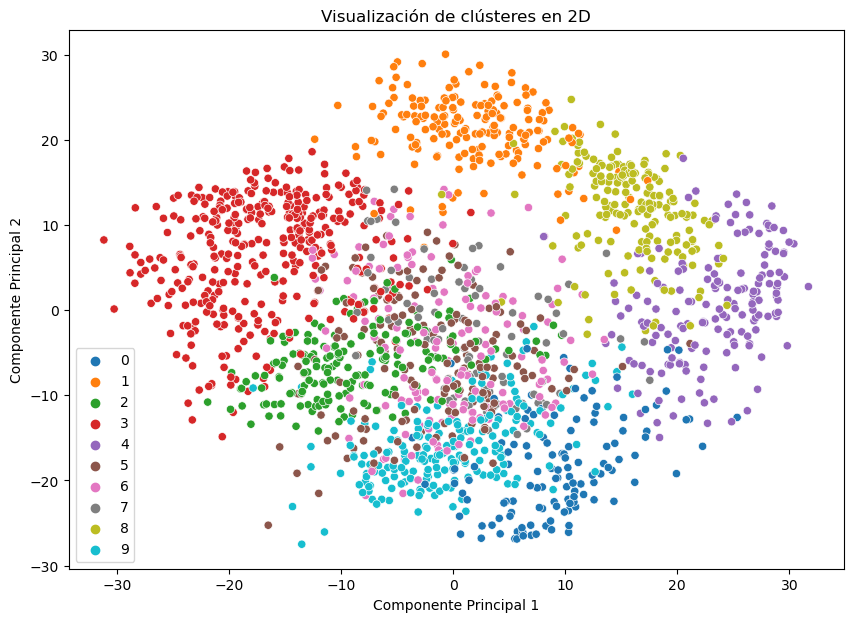

In [74]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_reduced)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters, palette="tab10", legend="full")
plt.title("Visualización de clústeres en 2D")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()